In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv("8_GoldPrice_Prediction.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

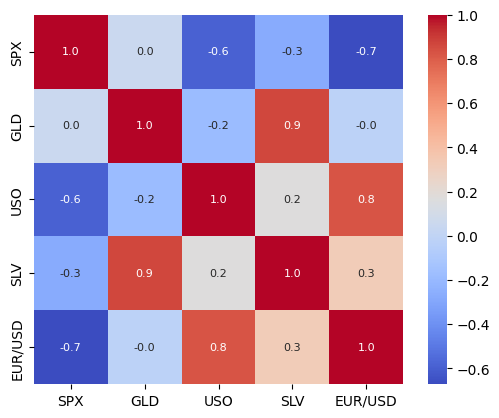

In [8]:
sns.heatmap(data = data.drop(columns = 'Date', axis = 1).corr(), cbar = True, square = True, cmap = "coolwarm", annot = True, annot_kws = {'size': 8}, fmt = ".1f")
plt.show()

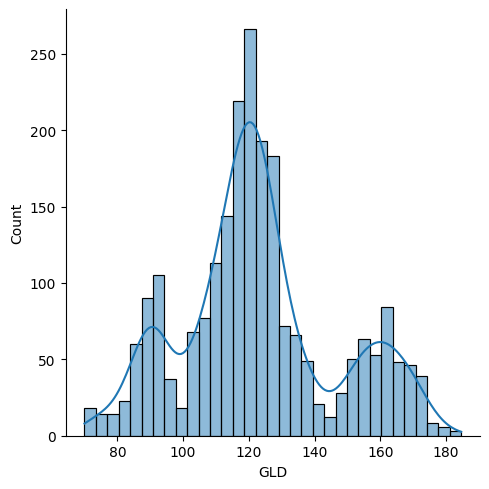

In [10]:
sns.displot(data['GLD'], kde = True)
plt.show()

In [11]:
X = data.drop(columns = ['GLD', 'Date'], axis  = 1)
Y = data["GLD"]

In [12]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [13]:
model = RandomForestRegressor()

In [14]:
model.fit(xTrain, yTrain)

RandomForestRegressor()

In [23]:
#Predicting Training Data
prediction = model.predict(xTrain)
r_2 = metrics.r2_score(yTrain, prediction)

print(r_2)

0.9984563790382419


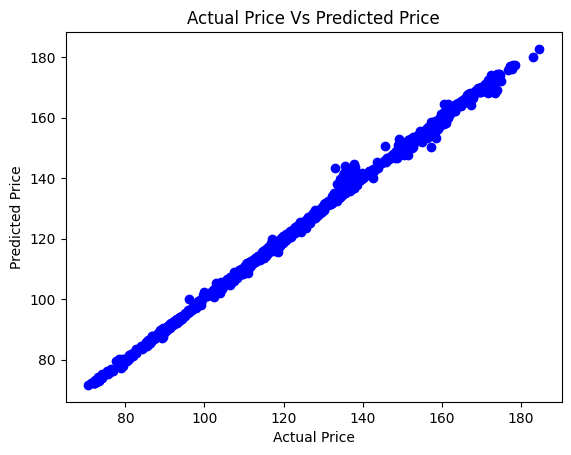

In [24]:
#Visualize Training Evaluation
plt.scatter(yTrain, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

[]

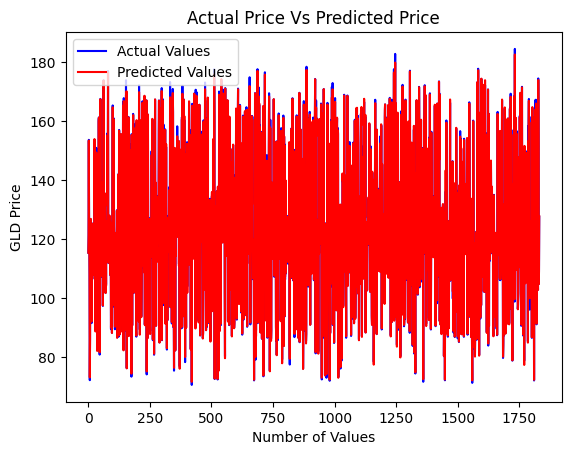

In [27]:
plt.plot(list(yTrain),color = 'blue', label = "Actual Values")
plt.plot(prediction, color = 'red', label = "Predicted Values")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.plot()

In [28]:
#Predicting Testing Data
prediction = model.predict(xTest)
r_2 = metrics.r2_score(yTest, prediction)

print(r_2)

0.9859578696980829


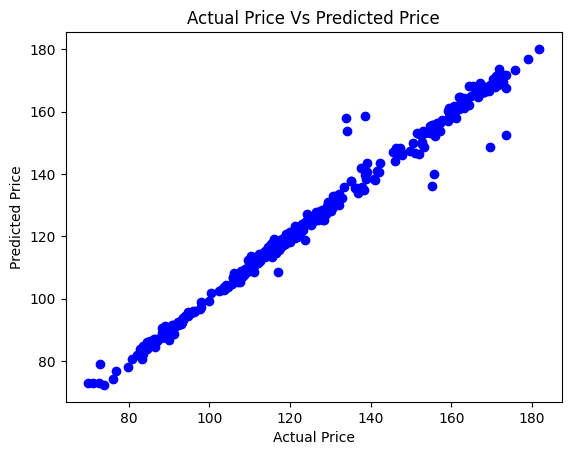

In [29]:
#Visualize Test Evaluation
plt.scatter(yTest, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

[]

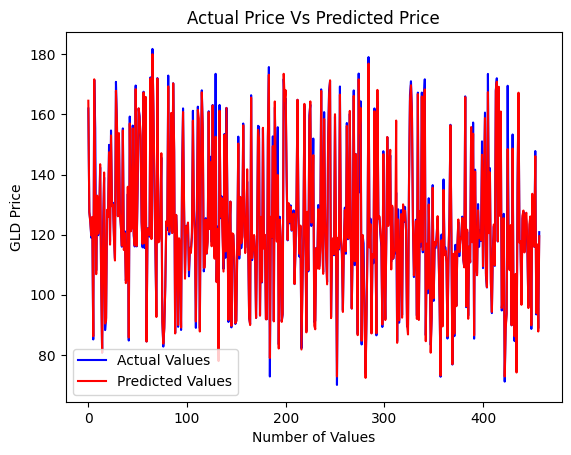

In [30]:
plt.plot(list(yTest),color = 'blue', label = "Actual Values")
plt.plot(prediction, color = 'red', label = "Predicted Values")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.plot()